In [ ]:

!pip install tensorflow
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 44.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GloVe')


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=166ab27e881b0588c0298a66181cfc6b1698369238e47ddc90af96620965ed7d
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
import contractions
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import gensim
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from sklearn.metrics import classification_report
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/sample_data/categorized_new_tweets.csv')
test_data= pd.read_csv('/content/sample_data/Unseen 5pillarsEarthUK.csv',encoding='cp1252', quotechar='"', delimiter=',')

In [ ]:
# Count the number of tweets in each category
category_counts = train_data['category_name'].value_counts()

# Create a bar plot using plotly
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             labels={'x': 'Category Names', 'y': 'Number of Tweets'},
             title='Number of Tweets in Each Category',
             width=400, height=600)
# Show the plot
fig.show()

In [ ]:
# download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# get stop words
stop_words = set(stopwords.words('english'))
# create lemmatizer
lemmatizer = WordNetLemmatizer()


# define regular expression patterns for removing URLs, HTML tags, and emojis
#url_pattern = re.compile(r'http\S+|www\S+')
#html_pattern = re.compile('<.*?>')
#emoji_pattern = re.compile('[\U0001f600-\U0001f650]')

# define patterns for url, html tags, and emojis
url_pattern = re.compile(r'https?://\S+|www\.\S+')
html_pattern = re.compile(r'<.*?>')
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "they would have"
}

In [ ]:
# function to clean text and lemmatize text
def clean_tokenize_lemmatize(text):
    if isinstance(text, dict):
        text = text['full_text']
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove emojis using regex
    text = re.sub(r'[^\w\s,]', '', text)
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
    # expand contractions
    text = contractions.fix(text)
    
    # convert text to lowercase
    text = text.lower()
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return tokens

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# apply clean_text function to train data
train_data['text'] = train_data['full_text'].apply(clean_tokenize_lemmatize)

# apply clean_text function to test data
test_data['text'] = test_data['full_text'].apply(clean_tokenize_lemmatize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train_data['text'].shape


In [ ]:
# Prepare the data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train_data['text'].values)
X = tokenizer.texts_to_sequences(train_data['text'].values)
X = pad_sequences(X, maxlen=100)
y = pd.get_dummies(train_data['category_name']).values



In [ ]:
# Pad the sequences
train = pad_sequences(train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

NameError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
path = "/content/drive/MyDrive/GloVe/glove.twitter.27B.100d.txt"
with open(path, encoding='utf-8') as f:
    embeddings_index = {}
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Create an embedding matrix
num_words = min(len(word_index), len(embeddings_index))
embedding_matrix = np.zeros((num_words, 100))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found 18946 unique tokens.


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9118, 100) (9118, 4)
(3908, 100) (3908, 4)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
!pip install torchkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 91.3 MB/s eta 0:00:00


In [ ]:
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
# Build the model
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
#model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)



Epoch 1/10
143/143 [==============================] - 26s 64ms/step - loss: 1.0993 - accuracy: 0.5617 - val_loss: 0.9871 - val_accuracy: 0.6134
Epoch 2/10
143/143 [==============================] - 6s 44ms/step - loss: 0.9936 - accuracy: 0.6061 - val_loss: 0.9458 - val_accuracy: 0.6279
Epoch 3/10
143/143 [==============================] - 5s 33ms/step - loss: 0.9239 - accuracy: 0.6354 - val_loss: 0.9124 - val_accuracy: 0.6436
Epoch 4/10
143/143 [==============================] - 3s 23ms/step - loss: 0.8559 - accuracy: 0.6689 - val_loss: 0.8675 - val_accuracy: 0.6694
Epoch 5/10
143/143 [==============================] - 3s 23ms/step - loss: 0.7897 - accuracy: 0.6934 - val_loss: 0.8322 - val_accuracy: 0.6784
Epoch 6/10
143/143 [==============================] - 4s 26ms/step - loss: 0.7192 - accuracy: 0.7231 - val_loss: 0.8191 - val_accuracy: 0.6845
Epoch 7/10
143/143 [==============================] - 3s 22ms/step - loss: 0.6414 - accuracy: 0.7599 - val_loss: 0.8076 - val_accuracy: 0.687

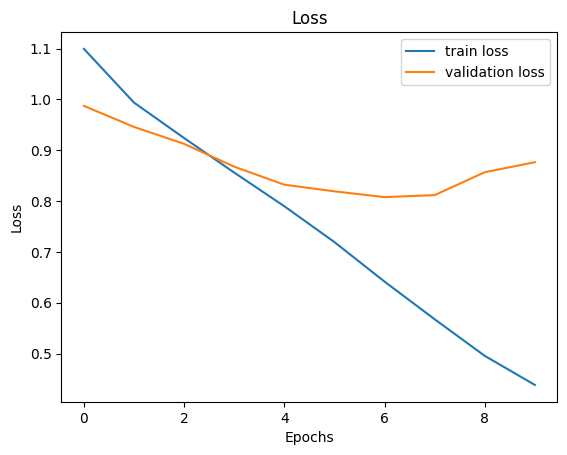

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

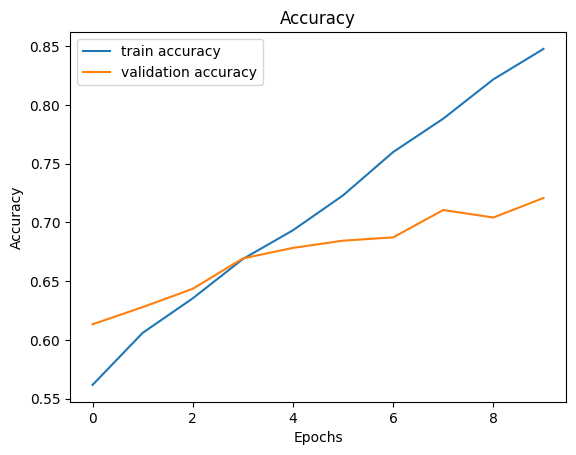

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

123/123 [==============================] - 1s 9ms/step - loss: 0.8764 - accuracy: 0.7208
Test Loss: 0.876378059387207
Test Accuracy: 0.7208290696144104


In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

123/123 [==============================] - 3s 13ms/step


Confusion Matrix:
 [[1109   80  248   60]
 [  96  297   82   19]
 [ 192   43 1300   60]
 [  78   11  122  111]]


Text(0.5, 1.0, 'Confusion Matrix')

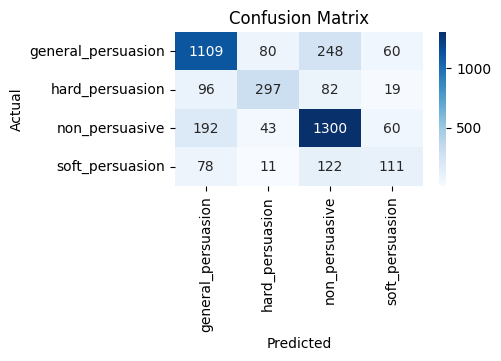

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
# Compute and plot confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_data['category_name'].unique(),
            yticklabels=train_data['category_name'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


In [ ]:
# Define the category names
category_names = train_data['category_name'].unique()

# Convert the category names to a list of strings
category_names = [str(category_name) for category_name in category_names]

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred_classes,target_names=category_names))

                    precision    recall  f1-score   support

general_persuasion       0.75      0.74      0.75      1497
   hard_persuasion       0.69      0.60      0.64       494
    non_persuasive       0.74      0.82      0.78      1595
   soft_persuasion       0.44      0.34      0.39       322

          accuracy                           0.72      3908
         macro avg       0.66      0.63      0.64      3908
      weighted avg       0.71      0.72      0.72      3908



In [ ]:
# Prepare the test data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(test_data['text'].values)
test = tokenizer.texts_to_sequences(train_data['text'].values)
test = pad_sequences(X, maxlen=100)
#y = pd.get_dummies(train_data['category_name']).values

In [ ]:
#creating submission.csv for BiLSTM model
seq = tokenizer.texts_to_sequences(test_data['text'])
padded = pad_sequences(seq, maxlen=100)
pred = model.predict(padded)
labels = ['non_persuasive','hard_persuasion','general_persuasion','soft_persuasion']


# Create a DataFrame with the tweet, URL, and predicted label
results_df = pd.DataFrame({
    'Tweet': test_data['full_text'],
    'URL': test_data['url'],
    'Predicted Label': [labels[np.argmax(p)] for p in pred]
})

# Export the DataFrame to a CSV file
results_df.to_csv('BiLSTM_GloVe_results.csv', index=False)

51/51 [==============================] - 0s 9ms/step
